This notebook implements the paper titled:

*Shadow removal of text document images by estimating local and global background colors*

We start by importing required packages and loading images. The loaded image is determined by `filename`. Some suggested values are also provided to work with other images from `./dataset/document`.

<font color="blue">The definitions of the functions we implemented and used below can be found [here](helper_functions.py) under appropriate section.</font>

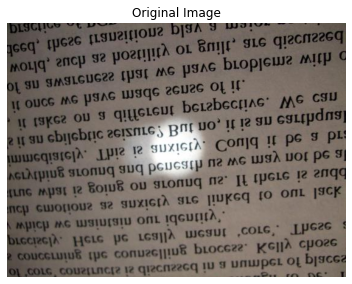

In [1]:
# Imports packages and prepares for execution (PreRUN)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import color,filters,transform
from scipy import ndimage as ndi
from helper_functions import *
from tqdm import tqdm


base_img_rpath = '../dataset/document/'  #dataset-read path
base_img_wpath = '../output/document/'   #output-write path
filename = 'textbook.jpg'  #choices = 'document.png', 'color_mosaic.jpg', 'textbook.jpg', 'manuscript.jpg'
ip_img = load_img(base_img_rpath + filename)


is_0_255 = True   #modifies algo if pixel values are 0-255 (False > color_mosaic), arg passed to functions.
f, ax = plot_img(ip_img, "Original Image")

The global background color i.e $I_c^{global}(\mathsf{x})$ is found using three possible ways. The parameter `choice` determines which method is called.

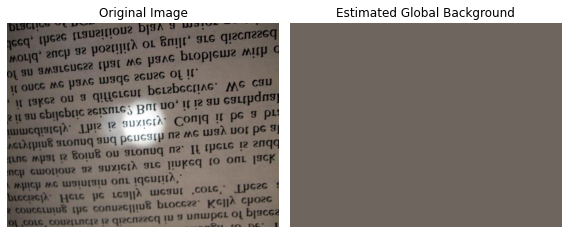

In [2]:
# Extracting global background colour

choice = 1

if choice==1:
    # Global average over each channel  (Approach #1)  
    I_global = get_global_colour_1(ip_img,is_0_255)
elif choice==2:
    # Max pixel value for each channel  (Approach #2)
    I_global = get_global_colour_2(ip_img,is_0_255)
elif choice==3:
    # Average of top 50 pixels          (Approach #3)
    I_global = get_global_colour_3(ip_img,is_0_255)
f,ax = show_img_compare(ip_img, I_global, 'Original Image', 'Estimated Global Background')

The local background i.e $I_c^{local}(\mathsf{x})$ is estimated using specific values of percentile parameter(`p`) and `block_size`. The cell below plots the preliminary estimation of local background.

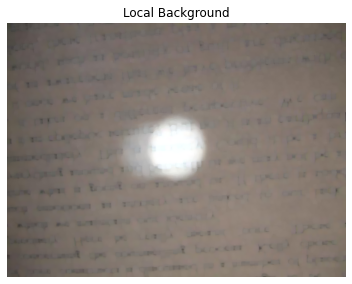

In [3]:
# Estimation of Local Background
p = 0.9
block_size = 7
I_local = get_local_bg(ip_img,p, block_size, is_0_255)
f,ax = plot_img(I_local, "Local Background")

The local background is refined using a median block technique as outlined in [1]. We call this result `I_local_refined`.

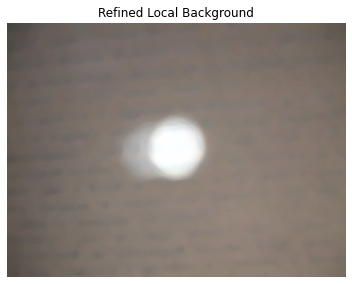

In [4]:
# Refined Estimation of Local Background
threshold = 0.01
median_block_size = 17
I_local_refined = get_local_bg_refined(I_local, ip_img, threshold, median_block_size, is_0_255)
f,ax = plot_img(I_local_refined, "Refined Local Background")

The resulting shadow-free or deshadowed image is obtained by dividing the input shadow image by the shadow map. The shadow map $S_c(\mathsf{x})$ is defined as [1]:

<font size="5">$$S_c(\mathsf{x}) = \frac{I_c^{local}(\mathsf{x})}{I_c^{global}(\mathsf{x})}$$</font>

The deshadowed image is calculated and plotted below.

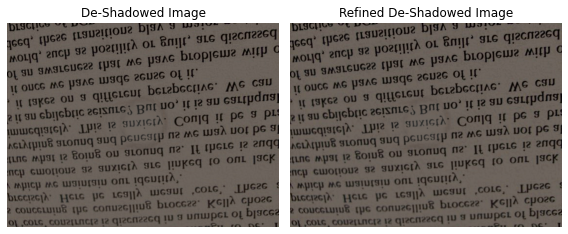

In [5]:
# Deshadowed Image
generate_deshadow(ip_img, I_local, I_global, is_0_255)
I_deshadow = generate_deshadow(ip_img, I_local, I_global, is_0_255)
I_deshadow_refined = generate_deshadow(ip_img, I_local_refined, I_global, is_0_255)

# Plotting 
title1 = 'De-Shadowed Image'
title2 = 'Refined De-Shadowed Image'
f, a = show_img_compare(I_deshadow, I_deshadow_refined, title1, title2)